<br>
<br>

# Z-Score Method for removing and detecting Outliers:

<br>
<br>

In [1]:


import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:

df = pd.read_csv("dataset/42_placement.csv")
np.random.seed(1)
df.sample(2)

,cgpa,placement_exam_marks,placed
507,6.77,75.0,1
818,5.52,62.0,0


Cgpa is almost normally distributed. But  Placement Exam Marks is not normally distributed.We Will 
apply the Z score method in cgpa column


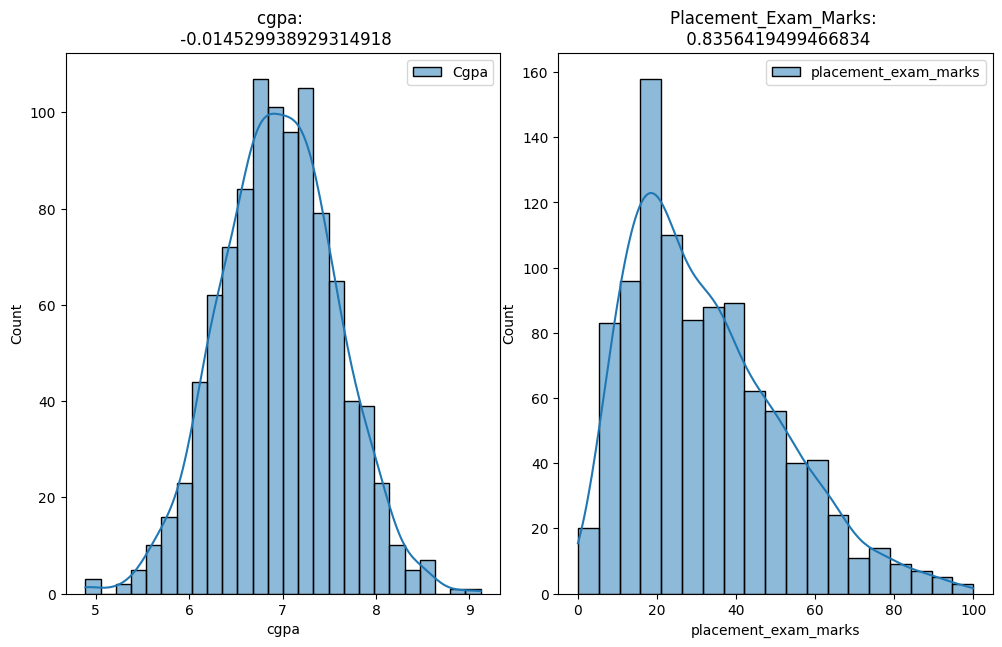

In [9]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
fig.tight_layout()

sns.histplot(data=df,x="cgpa",ax=ax[0],label = "Cgpa",kde=True)
ax[0].set_title(f"cgpa: \n {df["cgpa"].skew()}")
ax[0].legend()

sns.histplot(data=df,x="placement_exam_marks",ax=ax[1],label = "placement_exam_marks",kde=True)
ax[1].set_title(f"Placement_Exam_Marks: \n {df["placement_exam_marks"].skew()}")
ax[1].legend()

print('''Cgpa is almost normally distributed. But  Placement Exam Marks is not normally distributed.We Will 
apply the Z score method in cgpa column''')

<br>

# Apply Z-Score Method in Cgpa Columns:

<br>

In [11]:

print("Mean value of cgpa",df["cgpa"].mean())
print("Std value of cgpa",df["cgpa"].std())
print("Min value of cgpa",df["cgpa"].min())
print("Max value of cgpa",df["cgpa"].max())


Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [13]:

# Founding the boundary values:
hg = df['cgpa'].mean() + 3*df['cgpa'].std()
lw = df['cgpa'].mean() - 3*df['cgpa'].std()

print("Height allowed: ",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Height allowed: ",df['cgpa'].mean() - 3*df['cgpa'].std())


Height allowed:  8.808933625397168
Height allowed:  5.113546374602832


In [18]:

# Finding the outliers:
df[(df['cgpa']>hg) | (df['cgpa']<lw)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


<br>

# Trimming:

<br>

<br>

### Method: 01

<br>

In [20]:
new_df = df[(df['cgpa']<hg) & (df['cgpa']>lw)]
new_df # we remove total 5 outliers

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


<br>

### Method: 02

<br>

In [21]:
# caculate with z_score : formula given in pdf:

df["cgpa_z_score"] = (df['cgpa']-df['cgpa'].mean())/df["cgpa"].std()
df

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [22]:
df[df['cgpa_z_score']>3]

,cgpa,placement_exam_marks,placed,cgpa_z_score
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [23]:
df[df['cgpa_z_score']<-3]

,cgpa,placement_exam_marks,placed,cgpa_z_score
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [25]:
new_df = df[(df['cgpa_z_score']>-3)&(df['cgpa_z_score']<3)]
new_df # same output

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


<br>

# With Capping Method: 

<br>

In [26]:
hg # upper limit

8.808933625397168

In [27]:
lw # lower limit

5.113546374602832

In [28]:
# np.where(condition,if_true,if_false)
df["cgpa"] = np.where(
    df['cgpa']>hg,
    hg,
    np.where(
        df['cgpa']<lw,
        lw,
        df['cgpa']
    )
)

In [29]:
df.shape

(1000, 4)

In [31]:
df["cgpa"].describe()
# now max: 8.8 and min = 5.11

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64